In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
import pandas as pd


In [55]:
data = pd.read_csv('train.csv')
print(data.columns)
"""Make NaN values 0"""
data = data.drop("Id", axis=1)
"""One hot encoding for data"""
data = pd.get_dummies(data)
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_val = X_val.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val = torch.tensor(X_val.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val = torch.tensor(y_val.values, dtype=torch.float32)
X_train.shape

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_35258/1065471250.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_35258/1065471250.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_val = X_val.applymap(lambda x: int(x) if isinstance(x, bool) else x)


torch.Size([1168, 287])

In [61]:
class net(nn.Module):
    def __init__(self,input_size):
        super(net, self).__init__()
        self.fc1 = nn.Linear(input_size, 288)
        self.fc2 = nn.Linear(288, 144)
        self.fc3 = nn.Linear(144, 72)
        self.fc4 = nn.Linear(72, 36)
        self.fc5 = nn.Linear(36, 1)
    def forward(self, input):
        x1 = F.relu(self.fc1(input))
        x2 = F.relu(self.fc2(x1))
        x3 = F.relu(self.fc3(x2))
        x4 = F.relu(self.fc4(x3))
        x5 = self.fc5(x4)
        return x5

304

In [58]:
net = net(X_train.shape[1])
params = list(net.parameters())
print(len(params))
print(params[3].size())

10
torch.Size([144])


In [59]:
alpha = 0.001
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=alpha)

In [62]:
train_losses = []
val_losses = []
# Example training loop
num_epochs = 100
for epoch in range(num_epochs):
    net.train()
    
    # Forward pass
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record the training loss
    train_losses.append(loss.item())
    
    # Evaluate on validation set
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

TypeError: Module.train() missing 1 required positional argument: 'self'

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('train.csv')

# Make NaN values 0
data = data.fillna(0)

# One hot encoding for data
data = pd.get_dummies(data)

# Split features and target
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns to integers
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_val = X_val.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Define the neural network with dropout
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Determine the input size
input_size = X_train.shape[1]

# Instantiate the network with the correct input size
net = SimpleNet(input_size)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Lists to store loss values
train_losses = []
val_losses = []

# Example training loop
num_epochs = 100
for epoch in range(num_epochs):
    net.train()
    
    # Forward pass
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record the training loss
    train_losses.append(loss.item())
    
    # Evaluate on validation set
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_35258/515775761.py:26: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
/var/folders/1x/b33025vx60zd65yl_qvpjglc0000gn/T/ipykernel_35258/515775761.py:27: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_val = X_val.applymap(lambda x: int(x) if isinstance(x, bool) else x)


Epoch [10/100], Loss: 38885421056.0000, Val Loss: 39653806080.0000
Epoch [20/100], Loss: 38884823040.0000, Val Loss: 39653167104.0000
Epoch [30/100], Loss: 38883360768.0000, Val Loss: 39651536896.0000
Epoch [40/100], Loss: 38880198656.0000, Val Loss: 39647985664.0000
Epoch [50/100], Loss: 38874038272.0000, Val Loss: 39641247744.0000
Epoch [60/100], Loss: 38863343616.0000, Val Loss: 39629815808.0000
Epoch [70/100], Loss: 38846955520.0000, Val Loss: 39611949056.0000
Epoch [80/100], Loss: 38822494208.0000, Val Loss: 39585738752.0000
Epoch [90/100], Loss: 38787108864.0000, Val Loss: 39549149184.0000
Epoch [100/100], Loss: 38738579456.0000, Val Loss: 39500050432.0000


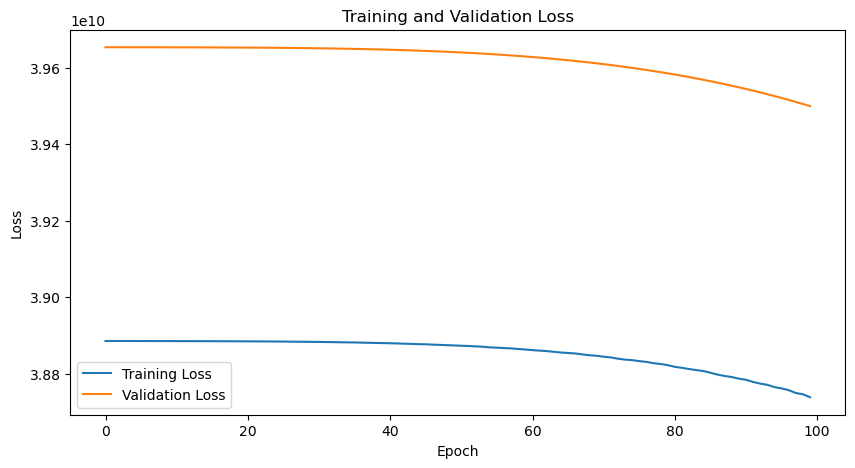

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv('train.csv')

# Make NaN values 0
data = data.fillna(0)

# One hot encoding for data
data = pd.get_dummies(data)

# Split features and target
X = data.drop("SalePrice", axis=1)
y = data["SalePrice"]

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert boolean columns to integers
X_train = X_train.applymap(lambda x: int(x) if isinstance(x, bool) else x)
X_val = X_val.applymap(lambda x: int(x) if isinstance(x, bool) else x)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
y_val = torch.tensor(y_val.values, dtype=torch.float32).view(-1, 1)

# Define the neural network with dropout
class SimpleNet(nn.Module):
    def __init__(self, input_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.dropout1 = nn.Dropout(0.5)
        self.fc2 = nn.Linear(128, 64)
        self.dropout2 = nn.Dropout(0.5)
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = self.fc3(x)
        return x

# Determine the input size
input_size = X_train.shape[1]

# Instantiate the network with the correct input size
net = SimpleNet(input_size)

# Define the loss function
criterion = nn.MSELoss()

# Define the optimizer
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Lists to store loss values
train_losses = []
val_losses = []

# Example training loop
num_epochs = 100
for epoch in range(num_epochs):
    net.train()
    
    # Forward pass
    outputs = net(X_train)
    loss = criterion(outputs, y_train)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # Record the training loss
    train_losses.append(loss.item())
    
    # Evaluate on validation set
    net.eval()
    with torch.no_grad():
        val_outputs = net(X_val)
        val_loss = criterion(val_outputs, y_val)
        val_losses.append(val_loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()